## Exercise 8.1
***Purpose***: Run the high level scripts with other data to see how
easy they are.

Consider the high-level script, `Jags-Ydich-XnomSsubj-MbernBetaExample.R`. For this exercise, you will use that script with a new data file, and notice
that you only need to change a single line, namely the one that loads the data file. In RStudio, open a new blank file by selecting the menu items

    File → New → Text file
    
Manually type in new fictional data in the same format as the data shown in
Section 8.4, p. 208, i.e.:

    y,s
    1,Reginald
    0,Reginald
    1,Reginald
    1,Reginald
    1,Reginald
    1,Reginald
    1,Reginald
    0,Reginald
    0,Tony
    0,Tony
    1,Tony
    0,Tony
    0,Tony
    1,Tony
    0,Tony

but with three subjects instead of two. Use whatever names you
fancy, and as many trials for each subject as you fancy. Perhaps put a preponderance of
0’s for one subject and a preponderance of 1’s for another subject. Use a lot of trials
of one subject, and relatively few trials for another. Save the file with a filename that
ends with `.csv`. Then, in the script, use that file name in the `read.csv` command.

In your report, include the data file and the graphical output of the analysis. Are the
estimates reasonable? What is the effect of different sample sizes for the estimates of
different subjects?

### `Jags-Ydich-XnomSsubj-Mbernbeta.R`
The following are the contents of `Jags-Ydich-XnomSsubj-Mbernbeta.R`:


*********************************************************************
Kruschke, J. K. (2015). Doing Bayesian Data Analysis, Second Edition:
A Tutorial with R, JAGS, and Stan. Academic Press / Elsevier.
*********************************************************************



Loading required package: coda
Linked to JAGS 4.3.0
Loaded modules: basemod,bugs


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 15
   Unobserved stochastic nodes: 2
   Total graph size: 35

Initializing model

Burning in the MCMC chain...
Sampling final MCMC chain...
                       Mean    Median      Mode     ESS HDImass      HDIlow
theta[1]          0.6664905 0.6754979 0.6800789 50335.9    0.95  0.41076357
theta[2]          0.3637326 0.3548657 0.3374123 50000.0    0.95  0.10748286
theta[1]-theta[2] 0.3027578 0.3112971 0.3478864 50000.0    0.95 -0.07207226
                    HDIhigh CompVal PcntGtCompVal ROPElow ROPEhigh PcntLtROPE
theta[1]          0.9059040      NA            NA      NA       NA         NA
theta[2]          0.6354506      NA            NA      NA       NA         NA
theta[1]-theta[2] 0.6672681       0        93.602      NA       NA         NA
                  PcntInROPE PcntGtROPE
theta[1]                  NA         NA
theta[2]                  NA         NA

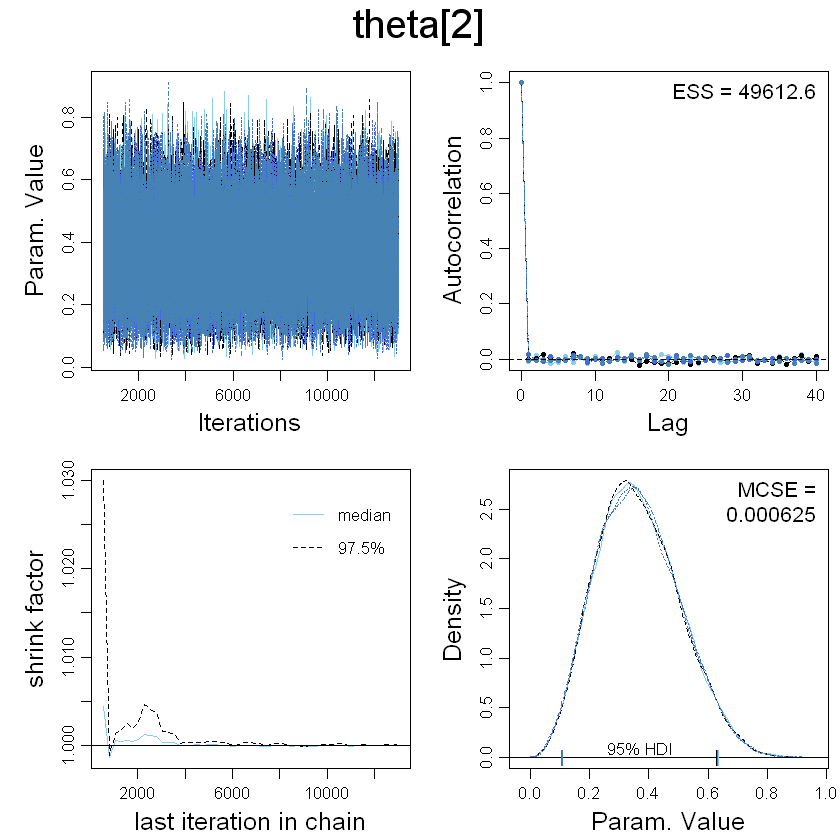

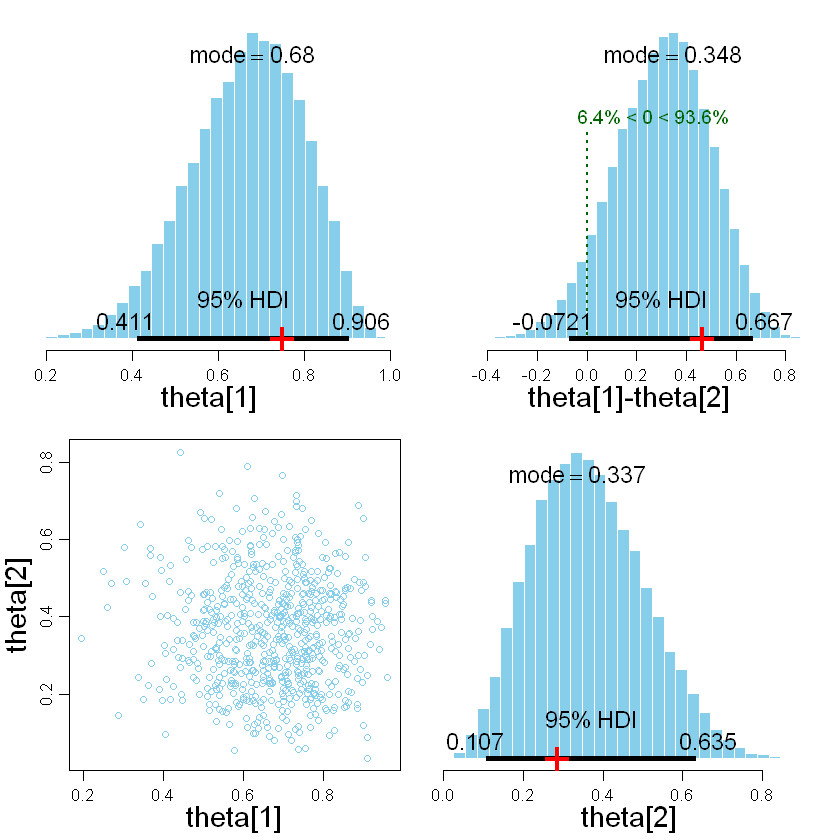

In [3]:
# Example for Jags-Ydich-XnomSsubj-Mbernbeta.R 
#------------------------------------------------------------------------------- 
# Optional generic preliminaries:
graphics.off() # This closes all of R's graphics windows.
rm(list=ls())  # Careful! This clears all of R's memory!
#------------------------------------------------------------------------------- 
# Load The data 
myData = read.csv("z6N8z2N7.csv")
# N.B.: The functions below expect the data to be a data frame, 
# with one component named y being a vector of integer 0,1 values,
# and one component named s being a factor of subject identifiers.
#------------------------------------------------------------------------------- 
# Load the relevant model into R's working memory:
source("Jags-Ydich-XnomSsubj-MbernBeta.R")
#------------------------------------------------------------------------------- 
# Optional: Specify filename root and graphical format for saving output.
# Otherwise specify as NULL or leave saveName and saveType arguments 
# out of function calls.
fileNameRoot = "Jags-Ydich-XnomSsubj-MbernBeta-" 
graphFileType = "eps" 
#------------------------------------------------------------------------------- 
# Generate the MCMC chain:
mcmcCoda = genMCMC( data=myData , numSavedSteps=50000 , saveName=fileNameRoot )
#------------------------------------------------------------------------------- 
# Display diagnostics of chain, for specified parameters:
parameterNames = varnames(mcmcCoda) # get all parameter names
for ( parName in parameterNames ) {
  diagMCMC( codaObject=mcmcCoda , parName=parName , 
                saveName=fileNameRoot , saveType=graphFileType )
}
#------------------------------------------------------------------------------- 
# Get summary statistics of chain:
summaryInfo = smryMCMC( mcmcCoda , compVal=NULL , #rope=c(0.45,0.55) ,
                        compValDiff=0.0 , #ropeDiff = c(-0.05,0.05) ,
                        saveName=fileNameRoot )
# Display posterior information:
plotMCMC( mcmcCoda , data=myData , compVal=NULL , #rope=c(0.45,0.55) ,
          compValDiff=0.0 , #ropeDiff = c(-0.05,0.05) ,
          saveName=fileNameRoot , saveType=graphFileType )
#------------------------------------------------------------------------------- 


## Exercise 8.2
*** Purpose***: Pay attention to the output of `smryMCMC`.

The graphical plots from plotMCMC are useful for understanding, but they lack some numerical
details. Run the high-level script, `Jags-Ydich-XnomSsubj-MbernBeta-Example.R`, and
explain the details in the output from smryMCMC. Explain what the rope and ropeDiff
arguments do.

## Exercise 8.3
***Purpose***: Notice what gets saved by the high-level scripts.] Run
the high-level script, Jags-Ydich-XnomSsubj-MbernBeta-Example.R, and notice what
files are created (i.e., saved) in your computer’s working directory. Explain what these
files are, and why they might be useful for future reference. Hint: In the file Jags-YdichXnomSsubj-MbernBeta.R, search for the word “save.”

## Exercise 8.4
***Purpose***: Explore the prior on a difference of parameters
implied from the priors on the individual parameters.]
(A) Reproduce Figure 8.7 in Section 8.5. Explain how you did it.
(B) Change the priors on the individual θ’s to beta(θ|1, 1) and produce the figure
anew. Describe its panels and explain.
(C) Change the priors on the individual θ’s to beta(θ|0.5, 0.5) and produce the figure
again. Describe its panels and explain.